# Method dev for angular streaking simulations - class dev plus $N_2O$ demo/test
01/02/21
PH

Development & demo for matrix element and wavefunction expansion in the LF/AF.

*** PRELIMINARY - suspect there are issues with the formalism and/or numerics here, but the current results should be qualitatively correct.

---


## Formalism

(TO CHECK - conj D terms...?)

The usual [ePS eqns. for the MF results](https://epsproc.readthedocs.io/en/latest/demos/ePSproc_demo_Aug2019.html#Calculate-MFPADs) express the MF wavefunction as an expansion in the radial matrix elements plus some angular terms:

\begin{equation}
T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\theta_{\hat{k}},\phi_{\hat{k}},\theta_{\hat{n}},\phi_{\hat{n}})=\sum_{l,m,\mu}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)Y_{lm}^{*}(\theta_{\hat{k}},\phi_{\hat{k}})D_{\mu,\mu_{0}}^{1}(R_{\hat{n}})
\end{equation}

The MFPAD is then determined from the square of this function. Note here that the polarisation term is usually expressed in the LF, then rotated into the MF.

The [MFPAD can also be expressed in terms of $\beta_{LM}$ parameters, derived directly from the analytical square of the wavefunction](https://epsproc.readthedocs.io/en/latest/demos/ePSproc_BLM_calc_demo_Sept2019.html). In this case the various angular momenta are coupled directly, and the observable is expressed as a set of $\beta_{LM}$s. This is usually preferable for computation of observables, however, since these are derived from the coherent square of the wavefunction, there is no phase information, so for coupling into further calculations one may prefer to work with the effective matrix elements or wavefunctions directly.

For the LF the same considerations apply, although one usually works with the $\beta_{LM}$s. For the LF the wavefunctions can be written as:

\begin{equation}
^{LF}T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\hat{k}_{L},R_{\hat{n}})=\sum_{l,m,\mu,\Lambda}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)D_{m\Lambda}^{l*}(\Omega)Y_{l\Lambda}^{*}(\hat{k}_{L})D_{\mu,\mu_{0}}^{1*}(\Omega)
\end{equation}

where the notation has been simplified (following [1]), and an additional term $D_{m\Lambda}^{l}(\Omega)$ (where $\Omega$ denotes Euler angles $(\phi,\theta,\chi)$) rotates the MF projection terms $m$ into the LF, and all Euler angles are integrated over (i.e. all molecular alignments/MF polarization orientations). Note this is usually written with the opposite labels, i.e. $m$ is the LF projection term and $\lambda$ the MF term, but we'll keep the ePS notation for consistency here.





For the AF, the distribution is essentially a convolution (assuming that the rotational wavefunction is separable). (See [the AFBLM pages for more](https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html).)

ROUGHLY:

\begin{equation}
^{AF}T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\hat{k}_{L},R_{\hat{n}})=\intop d\Omega\sum_{K,Q,S}\sum_{l,m,\mu,\Lambda}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)D_{m\Lambda}^{l*}(\Omega)Y_{l\Lambda}^{*}(\hat{k}_{M})D_{\mu,\mu_{0}}^{1*}(\Omega)A_{Q,S}^{K}D_{Q,S}^{K*}(\Omega)
\end{equation}

Where $A_{Q,S}^{K}D_{Q,S}^{K}(\Omega)$ describes the axis distribution function in the LF Euler angles.

Here there is a triple product in $D$ - convert to non-conj terms (unnecessary?) then apply eqn. 3.118 in Zare:

\begin{eqnarray}
\intop d\Omega D_{m\Lambda}^{l*}(\Omega)D_{\mu,\mu_{0}}^{1*}(\Omega)D_{Q,S}^{K*}(\Omega) & = & \intop d\Omega(-1)^{m-\Lambda}(-1)^{\mu-\mu_{0}}(-1)^{Q-S}D_{-m,-\Lambda}^{l}(\Omega)D_{-\mu,-\mu_{0}}^{1}(\Omega)D_{-Q,-S}^{K}(\Omega)\\
 & = & 8\pi^{2}(-1)^{m-\Lambda}(-1)^{\mu-\mu_{0}}(-1)^{Q-S}\left(\begin{array}{ccc}
l & 1 & K\\
-m & -\mu & -Q
\end{array}\right)\left(\begin{array}{ccc}
l & 1 & K\\
-\Lambda & -\mu_{0} & -S
\end{array}\right)
\end{eqnarray}

Hence:

\begin{equation}
^{AF}T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\hat{k}_{L})=8\pi^{2}\sum_{K,Q,S}\sum_{l,m,\mu,\Lambda}A_{Q,S}^{K}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)(-1)^{m-\Lambda}(-1)^{\mu-\mu_{0}}(-1)^{Q-S}\left(\begin{array}{ccc}
l & 1 & K\\
-m & -\mu & -Q
\end{array}\right)\left(\begin{array}{ccc}
l & 1 & K\\
-\Lambda & -\mu_{0} & -S
\end{array}\right)Y_{l\Lambda}^{*}(\hat{k}_{M})
\end{equation}

For the geometric computations, define this similar to existing AF
$\Delta_{L,M}(K,Q,S)$ term (for AF $\beta_{LM}$ calculations):

\begin{equation}
^{AF}\Delta_{l,m}(K,Q,S)=(-1)^{m-\Lambda}(-1)^{\mu-\mu_{0}}(-1)^{Q-S}\left(\begin{array}{ccc}
l & 1 & K\\
-m & -\mu & -Q
\end{array}\right)\left(\begin{array}{ccc}
l & 1 & K\\
-\Lambda & -\mu_{0} & -S
\end{array}\right)
\end{equation}

Hence:

\begin{equation}
^{AF}T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\hat{k}_{L})=8\pi^{2}\sum_{K,Q,S}\sum_{l,m,\mu,\Lambda}A_{Q,S}^{K}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E){}^{AF}\Delta_{l,m}(K,Q,S)Y_{l\Lambda}^{*}(\hat{k}_{M})
\end{equation}

Where $^{AF}\Delta_{l,m}(K,Q,S)$ is a channel coupling parameter.


[1] Underwood, Jonathan G., and Katharine L. Reid. “Time-Resolved Photoelectron Angular Distributions as a Probe of Intramolecular Dynamics: Connecting the Molecular Frame and the Laboratory Frame.” The Journal of Chemical Physics 113, no. 3 (2000): 1067. https://doi.org/10.1063/1.481918.

## Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import xarray as xr

# Special functions
# from scipy.special import sph_harm
import spherical_functions as sf
import quaternion

# Performance & benchmarking libraries
# from joblib import Memory
# import xyzpy as xyz
import numba as nb

# Timings with ttictoc or time
# https://github.com/hector-sab/ttictoc
from ttictoc import TicToc
import time

# Package fns.
# For module testing, include path to module here
import sys
import os
modPath = r'D:\code\github\ePSproc'  # Win test machine
# modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
sys.path.append(modPath)
import epsproc as ep
# TODO: tidy this up!
from epsproc.util import matEleSelector
from epsproc.geomFunc import geomCalc

from epsproc.classes.base import ePSbase  # Data class
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
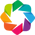

In [3]:
# Plotters
import matplotlib.pyplot as plt
from epsproc.plot import hvPlotters
hvPlotters.setPlotters()

### Load data

Testing for $N_2O$, core ionization. ([See notes here.](https://phockett.github.io/ePSdata/N2O-preliminary/N2O_1s_core_preliminary_ePSproc_AR_051020_dist.html))

In [4]:
# Load data from modPath\data
# dataPath = os.path.join(modPath, 'data', 'photoionization')
# dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# data = ePSbase(fileIn = dataFile, verbose = 1)
# data = ePSbase(dataPath, verbose = 1)
# data.scanFiles()

# N2O data
dataPath = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # Test dir on Stimpy (Win machine)
data = ePSmultiJob(dataPath, verbose = 0)
keys = [0,1,2]  # Set for 1s datasets only (ugly!)
data.scanFiles(keys = keys)

# # Scan data file
# dataSet = ep.readMatEle(fileIn = dataFile)
# dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')  # XS info currently not set in NO2 sample file.

In [5]:
data.jobsSummary()

Found 3 directories, with 21 files.

*** Job orb1 details
Key: orb1
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb1_S, 7 file(s).
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb1_S',
    'event': 'orb 1 ionization (O 1s, S/A1).',
    'orbE': -562.219888836424,
    'orbLabel': 'O 1s, S/A1'}

*** Job orb2 details
Key: orb2
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb2_S, 7 file(s).
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb2_S',
    'event': 'orb 2 ionization (N 1s, S/A1).',
    'orbE': -431.308631832806,
    'orbLabel': 'N 1s, S/A1'}

*** Job orb3 details
Key: orb3
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb3_S, 7 file(s).
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb3_S',
    'event': 'orb 3 ionization (N 1s, S/A1).',
    'orbE': -427.26774100883597,
    'orbLabel': 'N 1s, S/A1'}


Here orbitals 1,2,3 are all core 1s orbitals, centred on:

1. O
2. N (central)
3. N (terminal)

In [6]:
# Quick manual fix for orb/job labels for N1s channels

data.jobLabel(key='orb2', lString = "(central)")
data.jobLabel(key='orb3', lString = "(terminal)")

### Matrix elements

Note that in the plots greyed out values are below the threhold value.

Plotting data N2O_wf.orb1_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn
Plotting data N2O_wf.orb2_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn
Plotting data N2O_wf.orb3_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn


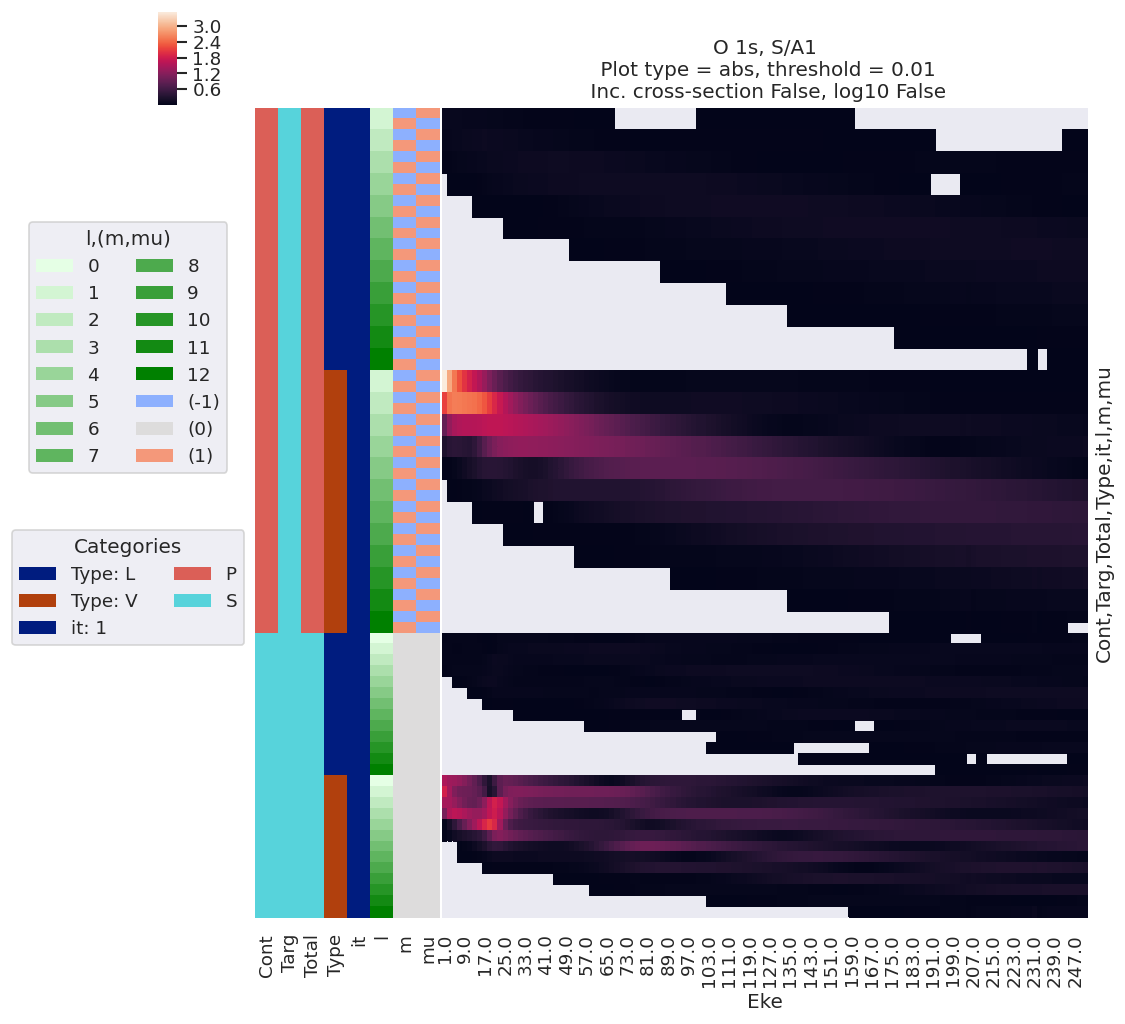

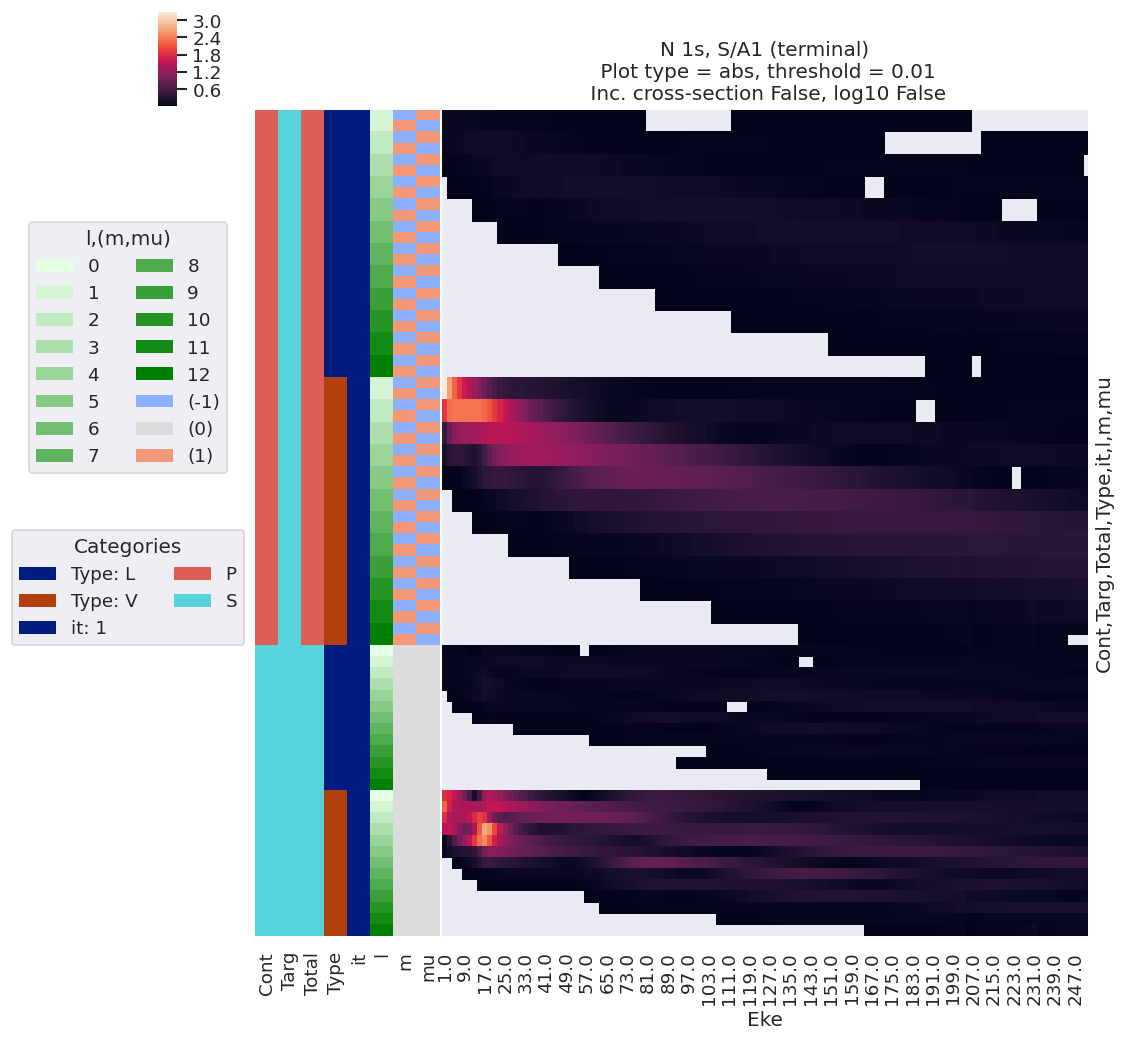

In [7]:
# key = 'orb1' # Set for O1s
# key = 'orb2' # Set for N1s (central)
# key = 'orb3' # Set for N1s (terminal)
# data.calcOpts['thres'] = 1e-4  # TODO: propagate global threshold setting! Used for calcs but not for plots at the moment.

# Plot matrix elements
# data.lmPlot(keys = key)
data.lmPlot()

## Default case, unaligned

In this case the axis distribution is isotropic, and there is only a single term with $A_{Q,S}^{K}=A_{0,0}^{0}=1$.

We'll calculate all the terms in the expression for $^{AF}T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\hat{k}_{L})$, but skip the summations and multiplication by $Y_{l\Lambda}^{*}(\hat{k}_{M})$, thus defining effective LF/AF matrix elements.

In [8]:
# Default alignment terms, 
AKQS = ep.setADMs()
# ep.lmPlot(AKQS, xDim='t')
AKQS

<xarray.DataArray 'ADM' (ADM: 1, t: 1)>
array([[1]])
Coordinates:
  * ADM      (ADM) MultiIndex
  - K        (ADM) int64 0
  - Q        (ADM) int64 0
  - S        (ADM) int64 0
  * t        (t) int32 0
Attributes:
    dataType:   ADM
    long_name:  Axis distribution moments
    units:      arb

In [9]:
# Run default af numeric code
# This will default to Type='L', it=1 and an isotropic axis distribution.
data.afpadNumeric()

Plotting data N2O_wf.orb1_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn
Plotting data N2O_wf.orb2_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn
Plotting data N2O_wf.orb3_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn


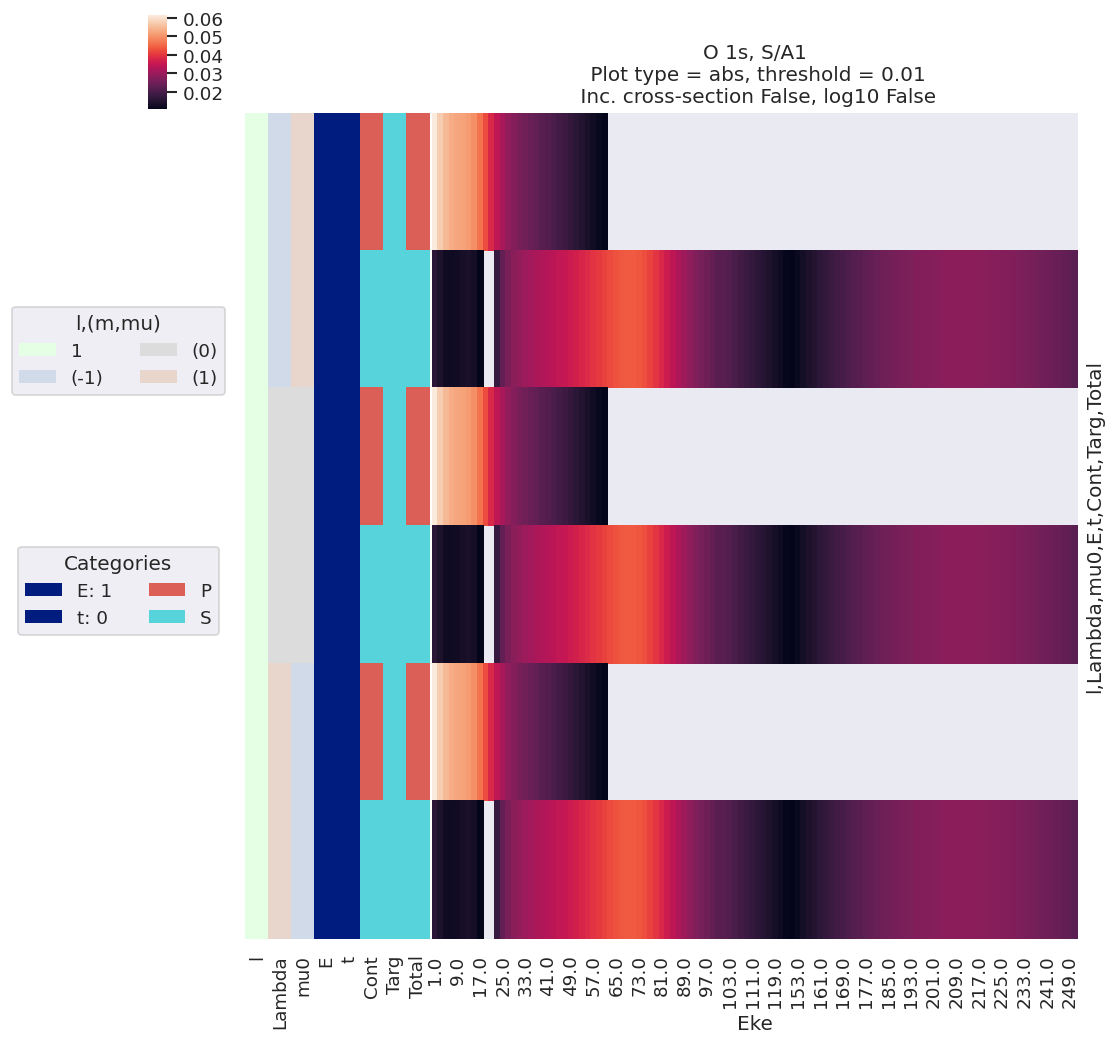

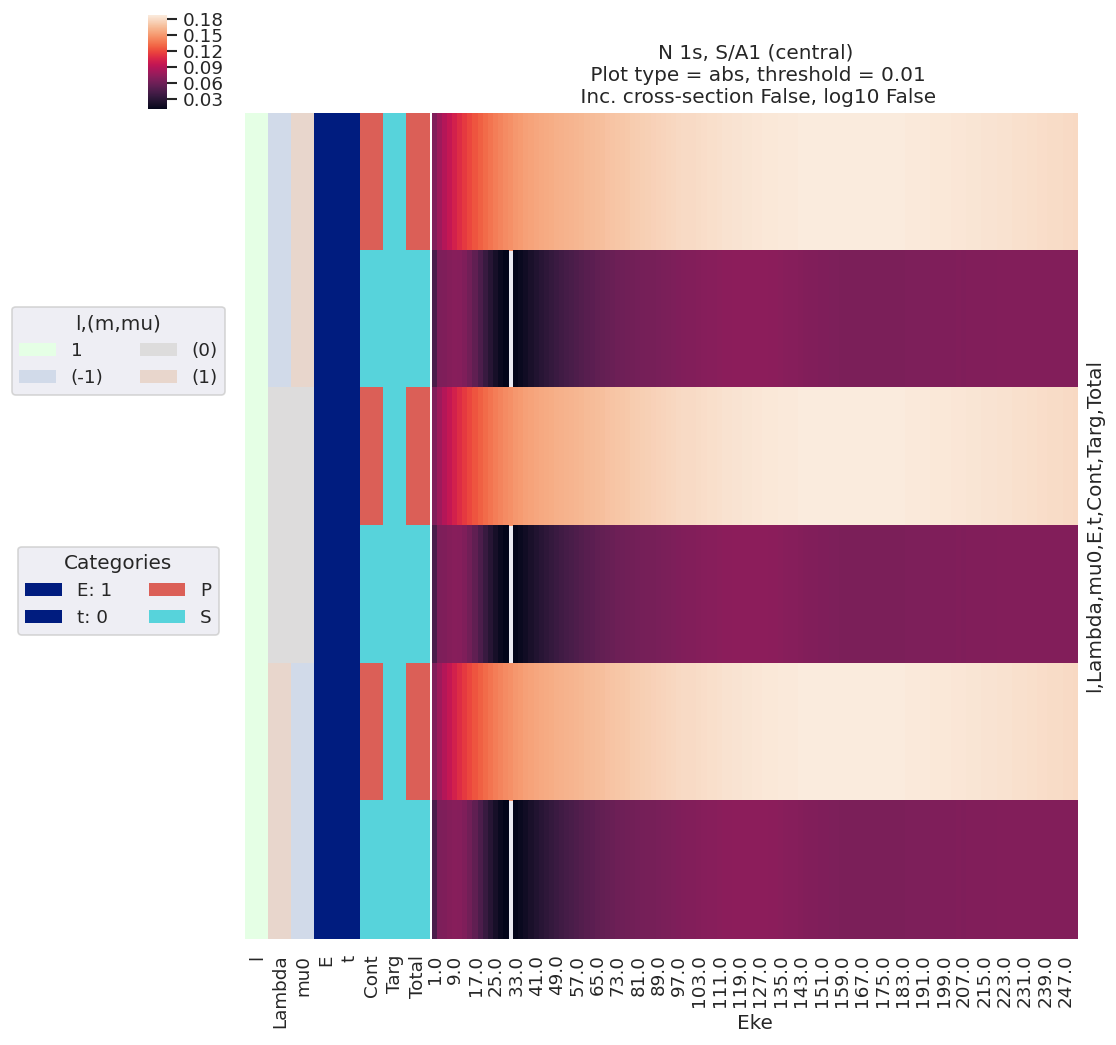

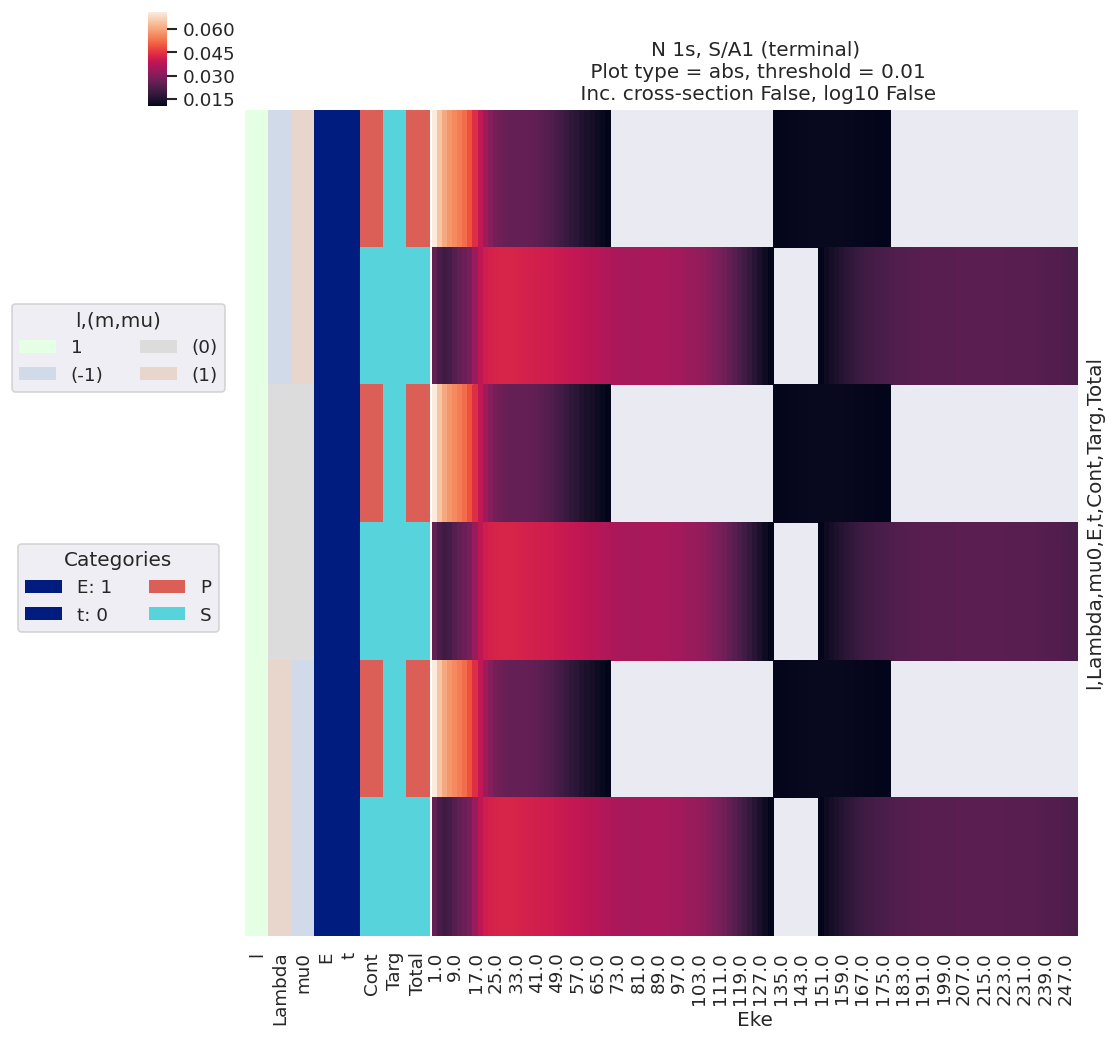

In [10]:
# Set plot options, this will also set defaults for reuse
sumDims=['m','mu']
plotDims=('l','Lambda','mu0')  # Set plotDims to force dim ordering in lmPlot
squeeze = False

data.lmPlot(dataType='TXaf', sumDims = sumDims, plotDims = plotDims, squeeze=squeeze)

Note that the LF/AF term has only $l=1$ terms in this case, so this is a strong filter on the observable.

## With alignment

Here we can look at the dependence of the channel coupling parameters $^{AF}\Delta_{l,m}(K,Q,S)$, as well as the final results for a given axis distribution...

### Channel couplings for various $K$

In this case, assume a $z$-polarized ionizing field, and a cylindrically symmetric distribution. To look at the channel couplings, set all terms $A_{Q,S}^{K}=A_{0,0}^{K}=1$ for even-$K$ up to $K_{max}=8$.

In [11]:
# Set ADMs
KQSlist = [[K,0,0,1] for K in range(0,9,2)]
AKQS = ep.setADMs(ADMs = KQSlist)  # TODO: routine to automate this type of setting!

# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AKQS, xDim = 't', pType = 'r', squeeze = False)  # Note squeeze = False required for 1D case (should add this to code!)
# daPlotpd
AKQS #.coords

<xarray.DataArray 'ADM' (ADM: 5, t: 1)>
array([[1],
       [1],
       [1],
       [1],
       [1]])
Coordinates:
  * ADM      (ADM) MultiIndex
  - K        (ADM) int64 0 2 4 6 8
  - Q        (ADM) int64 0 0 0 0 0
  - S        (ADM) int64 0 0 0 0 0
  * t        (t) int32 0
Attributes:
    dataType:   ADM
    long_name:  Axis distribution moments
    units:      arb

In [12]:
# Run AF numeric code with unity AKQS parameters
data.afpadNumeric(AKQS = AKQS)

In [13]:
# data.data['orb1']['DeltaKQS']

Plotting data N2O_wf.orb1_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


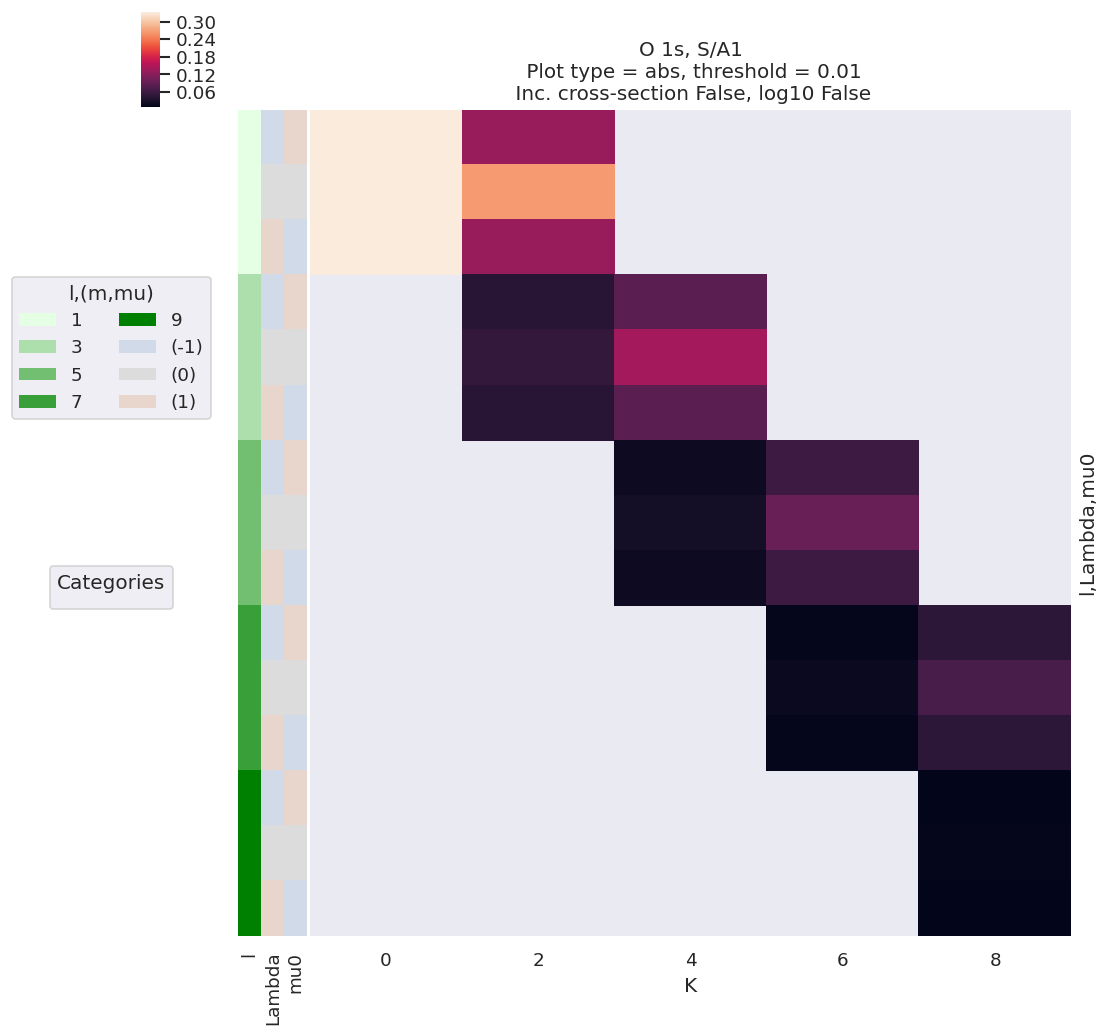

In [14]:
data.lmPlot(keys='orb1', dataType='DeltaKQS', xDim = 'K', squeeze = True)

This shows how higher $l$ couple into the LF/AF as the degree of alignment $K$ increases.

### Aligned frame effective matrix elements

Here's how that looks for the realistic matrix elements for each channel... in this case, to keep the $K$ contributions separate, they're set along a dummy time ($t$) variable, with the degree of alignment increasing with $t$.

Plotting data (No filename), pType=r, thres=0.01, with Seaborn


No handles with labels found to put in legend.


t        0    1    2    3    4
K Q S                         
0 0 0  1.0  1.0  1.0  1.0  1.0
2 0 0  NaN  0.5  0.8  0.8  0.8
4 0 0  NaN  NaN  NaN  0.5  0.8

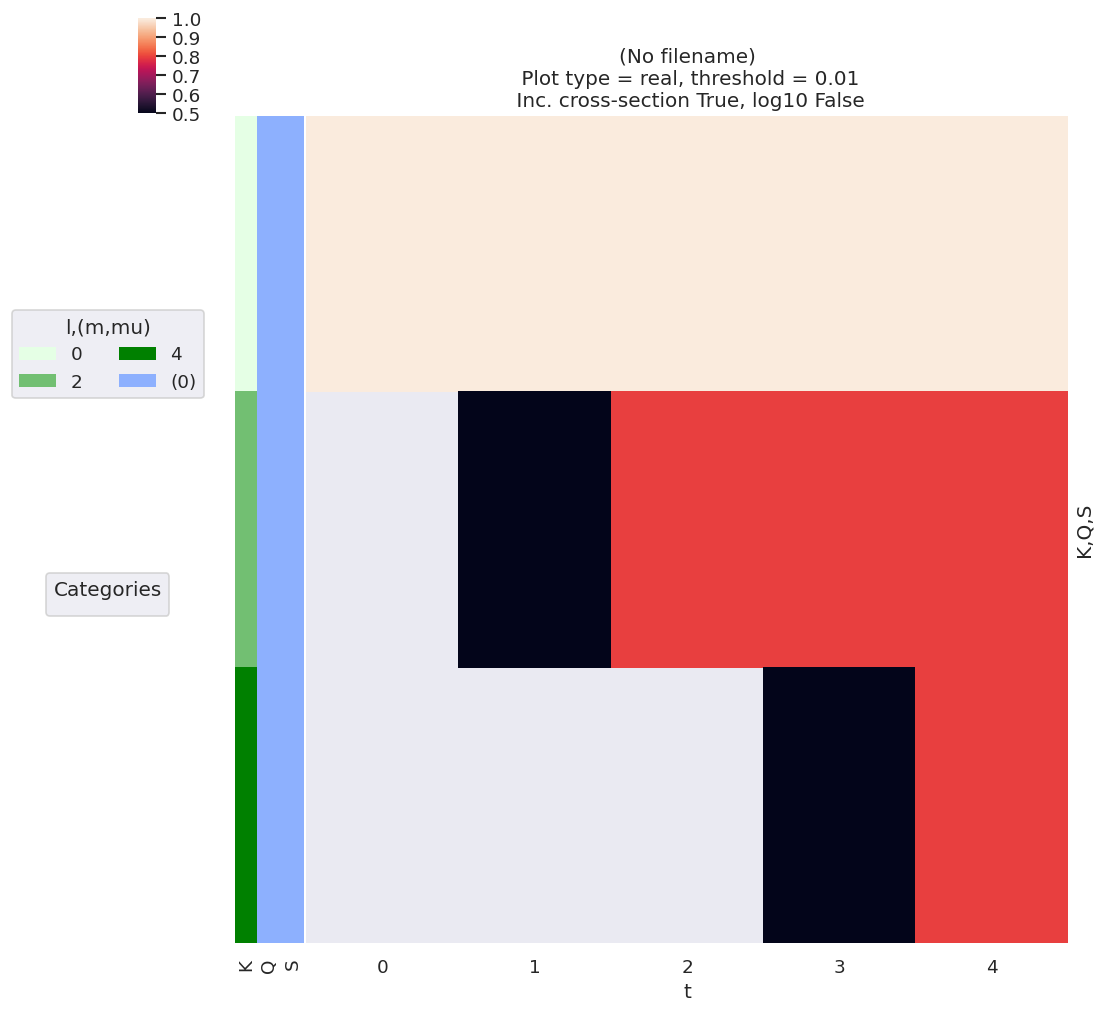

In [15]:
AKQS = ep.setADMs(ADMs = np.array([[0,0,0,1,1,1,1,1],[2,0,0,0,0.5,0.8,0.8,0.8],[4,0,0,0,0,0,0.5,0.8]]))  # TODO: routine to automate this type of setting!
# AKQS = ep.setADMs()
# ep.lmPlot(AKQS, xDim='t')
# AKQS
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AKQS, xDim = 't', pType = 'r', squeeze = False)  # Note squeeze = False required for 1D case (should add this to code!)
daPlotpd

In [16]:
# Run AF numeric code with t-dependent AKQS parameters
data.afpadNumeric(AKQS = AKQS)

Plotting data N2O_wf.orb1_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn
Plotting data N2O_wf.orb2_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn
Plotting data N2O_wf.orb3_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.01, with Seaborn


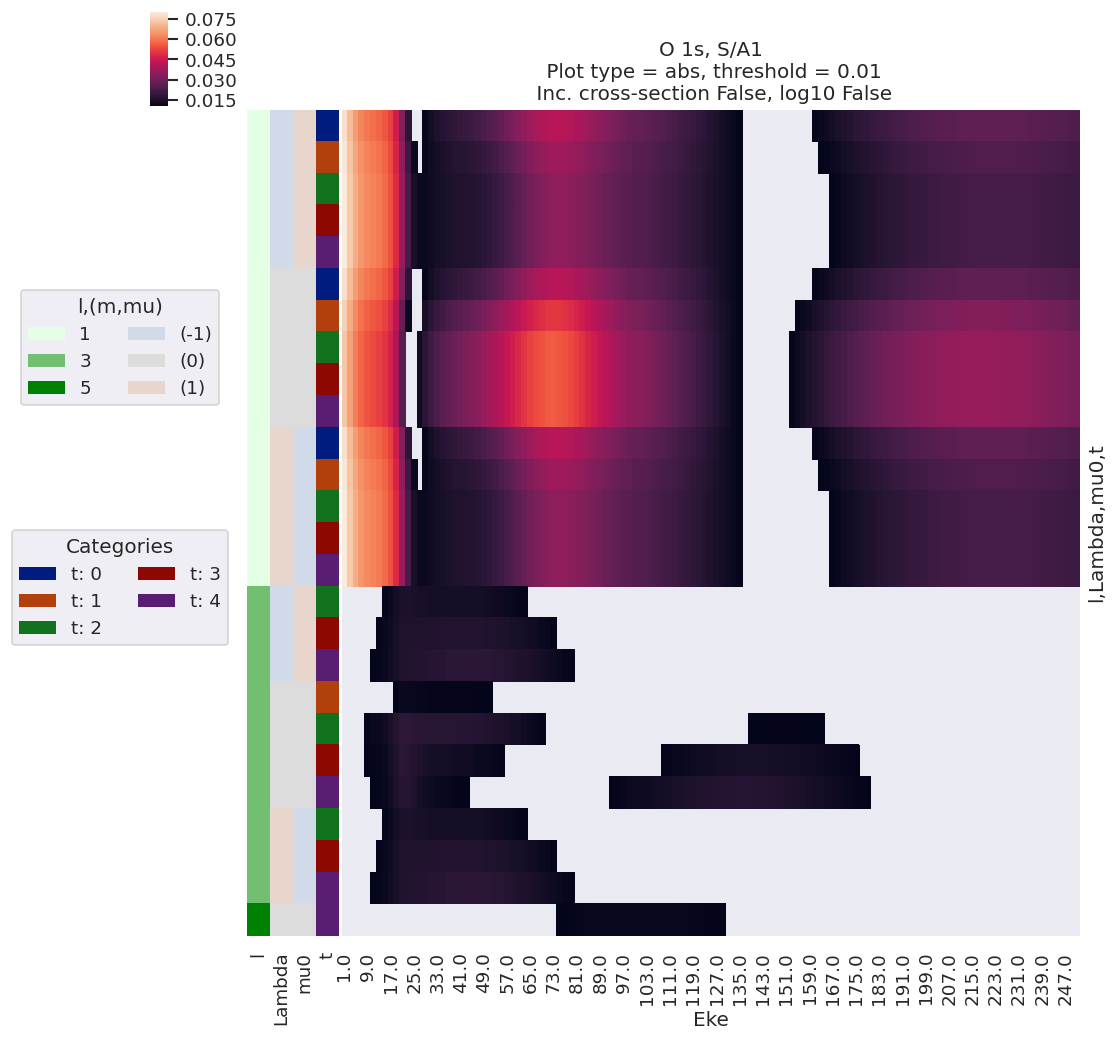

In [17]:
data.lmPlot(dataType='TXaf', sumDims=['m','mu','Sym']) #, fillna=True) # , sumDims = sumDims)

### Aligned frame angular distributions

Finally, the observable angular patterns can be investigated, by looking at $|^{AF}T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\hat{k}_{L})|^2$.


*** sphPlot dataType = afpad not recognised, trying anyway.
Using default sph betas.
Summing over dims: {'Sym'}
Found additional dims {'E'}, summing to reduce for plot. Pass selDims to avoid.
Grid plot: O 1s, S/A1, dataType: TXafSum, plotType: a2
*** sphPlot dataType = afpad not recognised, trying anyway.
Using default sph betas.
Summing over dims: {'Sym'}
Found additional dims {'E'}, summing to reduce for plot. Pass selDims to avoid.
Grid plot: N 1s, S/A1 (central), dataType: TXafSum, plotType: a2
*** sphPlot dataType = afpad not recognised, trying anyway.
Using default sph betas.
Summing over dims: {'Sym'}
Found additional dims {'E'}, summing to reduce for plot. Pass selDims to avoid.
Grid plot: N 1s, S/A1 (terminal), dataType: TXafSum, plotType: a2


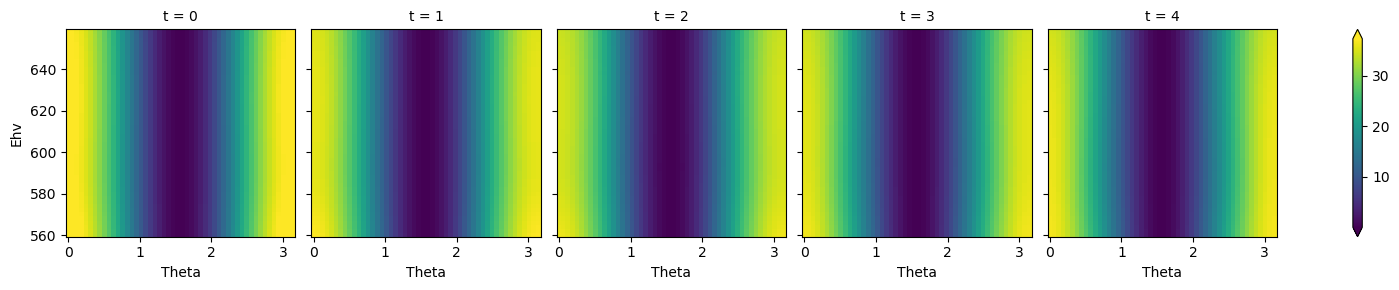

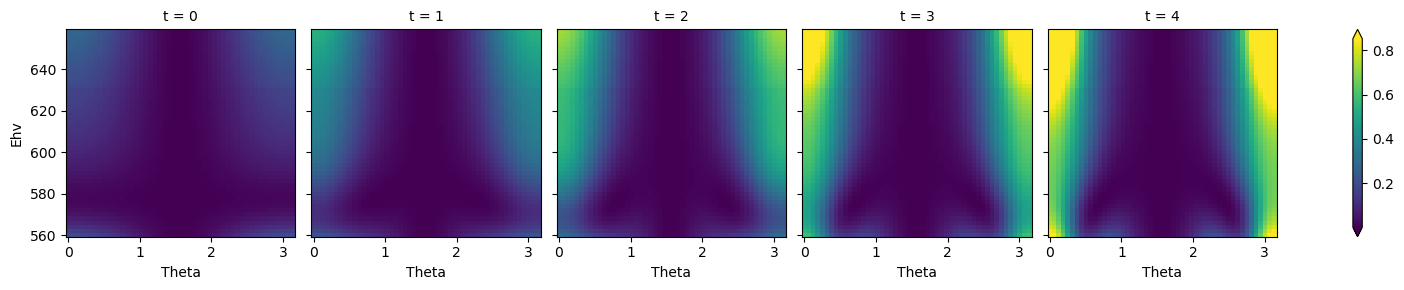

In [18]:
# Plot panels with padPlot
Erange = [560,660]

# This currently doesn't support the native dims, so reset these first and stack to standard LM representation (includes sum over MF terms)
for key in data.data.keys():
    data.data[key]['TXafSum'] = data.data[key]['TXaf'].sum(['m','mu']).rename({'Lambda':'m'}).stack({'BLM':['l','m']})
    data.data[key]['TXafSum'].attrs = data.data[key]['TXaf'].attrs

# Drop redundant phi coord
data.padPlot(Etype = 'Ehv', Erange = Erange, dataType='TXafSum', pType='a2', backend='mpl', sumDims=['Sym'], facetDims=['Ehv','t'], selDims={'mu0':0}, reducePhi='sum', pStyle='grid') 


This shows the general LF/AF behaviour for all 1s channels (O, N (central) and N (terminal from top to bottom) and increasing degrees of alignment (t). 

Of note is that, in all cases, the central N shows a similar angular distribution. This is in line with the [MFPAD behaviour, which showed only small changes as a function of energy](https://phockett.github.io/ePSdata/N2O-preliminary/N2O_1s_core_preliminary_ePSproc_AR_051020_dist.html). Other channels show more interesting changes with energy and alignment, corresponding to more structured MFPADs.

Since we're computing an effective wavefunction in this case, we can also look at the phases...


*** sphPlot dataType = afpad not recognised, trying anyway.
Using default sph betas.
Summing over dims: {'Sym'}
Found additional dims {'E'}, summing to reduce for plot. Pass selDims to avoid.
Grid plot: O 1s, S/A1, dataType: TXafSum, plotType: phase
*** sphPlot dataType = afpad not recognised, trying anyway.
Using default sph betas.
Summing over dims: {'Sym'}
Found additional dims {'E'}, summing to reduce for plot. Pass selDims to avoid.
Grid plot: N 1s, S/A1 (central), dataType: TXafSum, plotType: phase
*** sphPlot dataType = afpad not recognised, trying anyway.
Using default sph betas.
Summing over dims: {'Sym'}
Found additional dims {'E'}, summing to reduce for plot. Pass selDims to avoid.
Grid plot: N 1s, S/A1 (terminal), dataType: TXafSum, plotType: phase


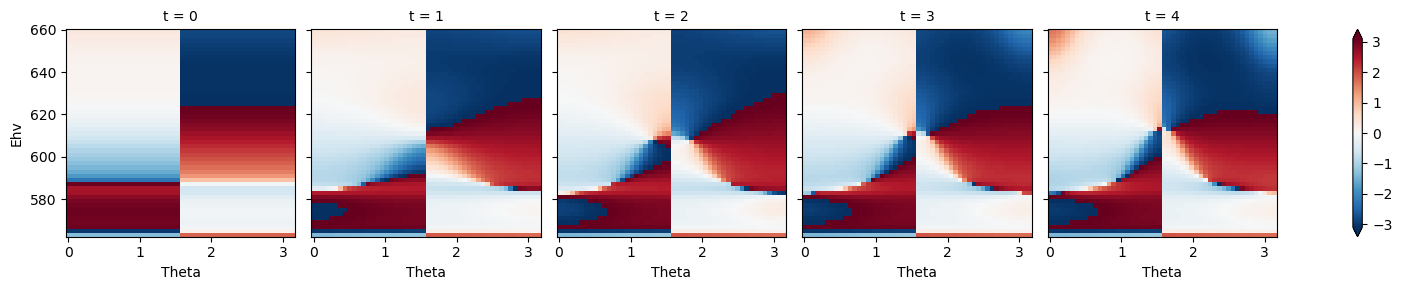

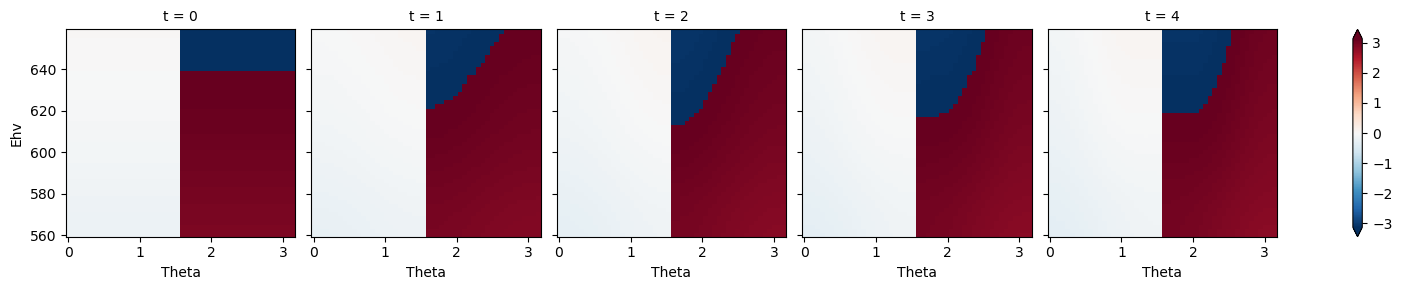

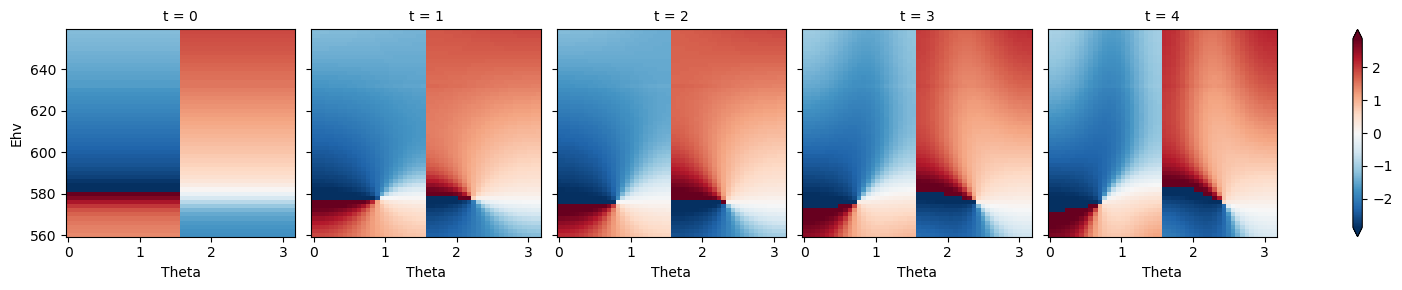

In [19]:
# Phase plot

data.padPlot(Etype = 'Ehv', Erange = Erange, dataType='TXafSum', pType='phase', backend='mpl', sumDims=['Sym'], facetDims=['Ehv','t'], selDims={'mu0':0}, reducePhi='sum', pStyle='grid') 

### Output to file

In [20]:
# Write consolidated matE to file
dataType = 'TXafSum'

# Generate Pandas versions
# data.matEtoPD(dataType = dataType, xDim = 'Eke', selDims = {'Type':'L'}, printTable = False)
data.matEtoPD(dataType = dataType, xDim = 'Eke', printTable = False)

for key in data.data.keys():
    fileName = f"N2O_{key}_matE-AF_consolidated_020221.csv"
    data.data[key][dataType].pd.T.to_csv(fileName, sep = '\t')

## Usual AF observables

Direct calculation of $\beta_{LM}$ parameters (see [the AFBLM pages for more](https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html)). The numerics for this [AF routine have been verified](https://epsproc.readthedocs.io/en/dev/methods/LF_AF_verification_tests_060720_tidy_100920.html), relative to direct LF results, but it doesn't give the wavefunctions directly.

In [21]:
# Compute & plot AF observables from usual Blm calculation
# NOTE - this calculates for mu0=0 only by default, but multiple polarization geometries (z,x,y), see https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html

data.AFBLM(AKQS = AKQS)
# data.padPlot(keys = key, Erange = [5, 15, 4], dataType='AFBLM', pType='a', backend='mpl', selDims={'Labels':['z','y']}, pStyle='grid')

Using default sph betas.
Summing over dims: set()
Grid plot: O 1s, S/A1, dataType: AFBLM, plotType: a
Using default sph betas.
Summing over dims: set()
Grid plot: N 1s, S/A1 (central), dataType: AFBLM, plotType: a
Using default sph betas.
Summing over dims: set()
Grid plot: N 1s, S/A1 (terminal), dataType: AFBLM, plotType: a


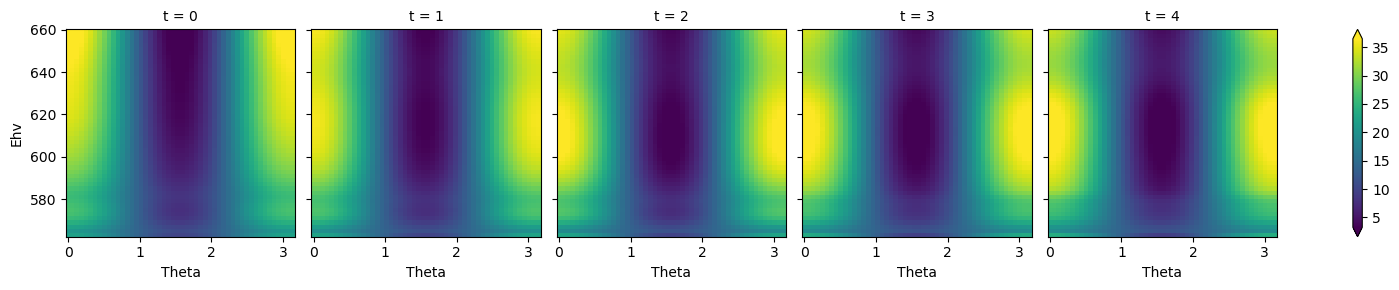

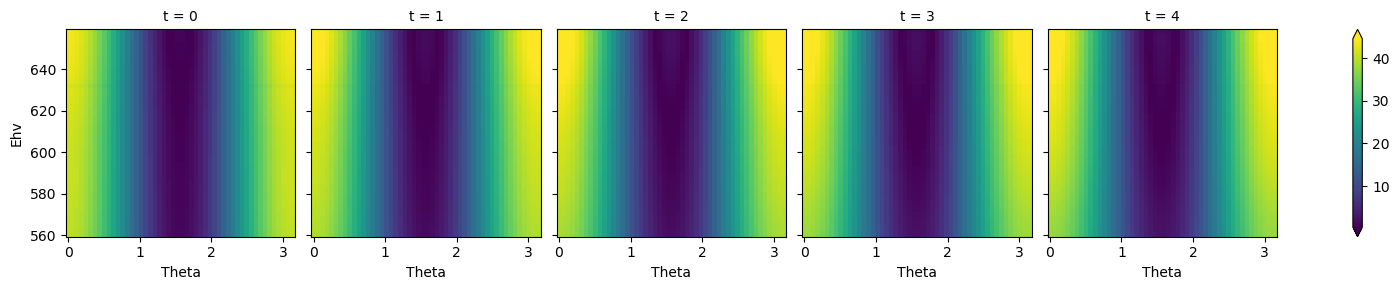

In [22]:
# Plot resulting distributions for each channel
data.padPlot(Etype = 'Ehv', Erange = Erange, dataType='AFBLM', pType='a', backend='mpl', sumDims=['Sym'], facetDims=['Ehv','t'], selDims={'Labels':'z'}, reducePhi='sum', pStyle='grid') 
# data.padPlot(Etype = 'Ehv', Erange = [550, 650, 10], dataType='AFBLM', pType='a', backend='mpl', facetDims=['t'], selDims={'Labels':'z'}, reducePhi='sum', pStyle='grid') 

Note that these is generally much less structure in these distributions, as compared to the "wavefunction" method above, suggesting that the wavefunction method is not quantitatively correct, although qualitatively OK, and probably useful for obtaining phase information.

The $\beta_{LM}$ parameters can also be inspected in this case... note the B00 term is normalised to unity in this case.

Dataset: orb1, O 1s, S/A1, AFBLM


C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)
C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)
C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)


Dataset: orb2, N 1s, S/A1 (central), AFBLM


C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)
C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)
C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)


Dataset: orb3, N 1s, S/A1 (terminal), AFBLM


C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)
C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  yplt = darray.transpose(xdim, huedim)


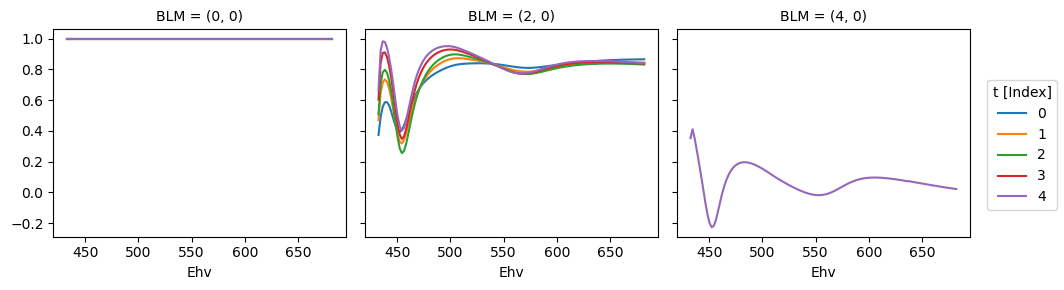

In [23]:
# data.lmPlot(dataType = 'AFBLM', selDims={'Labels':'z'}, sumDims = [])
# data.lmPlot(dataType = 'AFBLM', Etype='Ehv', selDims={'Labels':'z'}, squeeze = False)
data.BLMplot(dataType = 'AFBLM', selDims={'Labels':'z'}, Etype='Ehv', col='BLM')
# data.BLMplot(dataType = 'AFBLM', Etype='Ehv')

## Versions

In [24]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'jupyter'])

--------------------------------------------------------------------------------
  Date: Wed Feb 03 11:37:49 2021 Eastern Standard Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.3.0-dev
            xarray : 0.15.0
           jupyter : Version unknown
             numpy : 1.19.2
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------